# K-Means Clusterting

In [9]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the mall customers dataset

In [11]:
import pandas as pd
df = pd.read_csv("Mall Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify Similar customers on basis of Income and Spend

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

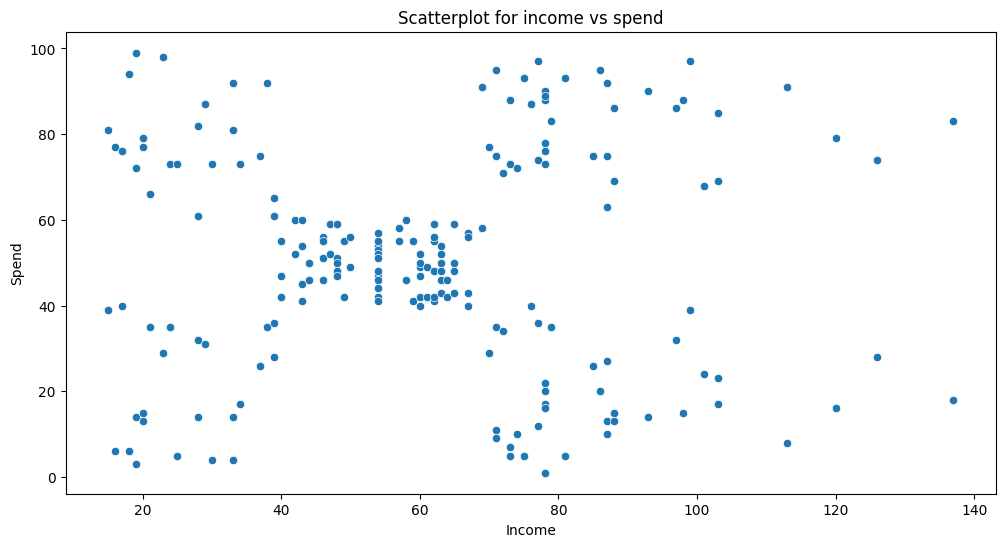

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot for income vs spend')
plt.show()

### Seperate X value from your data

In [19]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Preprocess the X data

In [20]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [22]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### For Kmean method find Optimal value of K with Elbow method

In [23]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

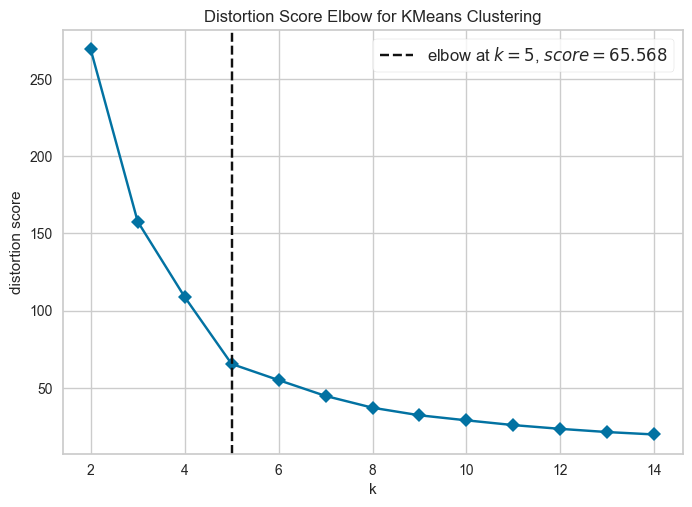

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [24]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2, 15),
                  timings=False)

### Create a KMeans model with number of clusters as 5

In [25]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [26]:
model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [27]:
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
X['Label']=model.labels_

In [29]:
X

,Income,Spend,Label
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [30]:
X['Label'].unique()

array([1, 3, 4, 2, 0])

In [31]:
X[X['Label']==0]

,Income,Spend,Label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [32]:
X[X['Label']==1]

,Income,Spend,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1


In [33]:
X[X['Label']==2]

,Income,Spend,Label
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [34]:
X[X['Label']==3]

,Income,Spend,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [35]:
X[X['Label']==4]

,Income,Spend,Label
43,39,61,4
46,40,55,4
47,40,47,4
48,40,42,4
49,40,42,4
...,...,...,...
121,67,40,4
122,69,58,4
126,71,35,4
132,72,34,4


### Visualize above clusters

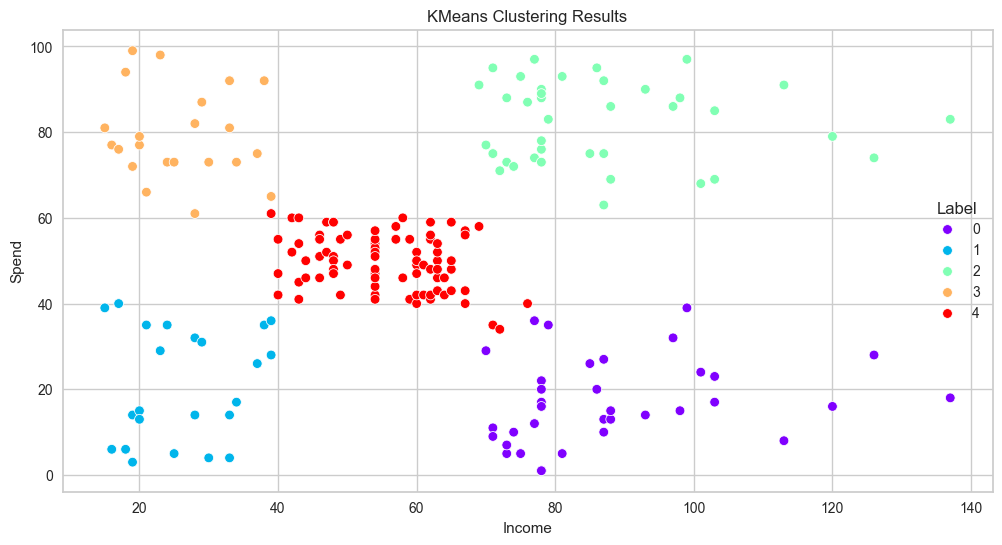

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMeans Clustering Results')
plt.show()

### Cluster Similar customers on basis of age, income and Spending

In [37]:
X2 = df[['Age', 'Income', 'Spend']]
X2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [38]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [39]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


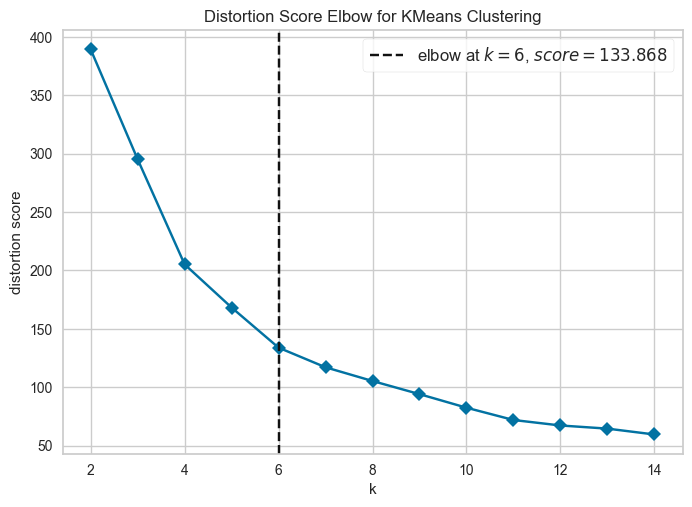

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [40]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2, 15),
                  timings=False)

In [41]:
model2 = KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [42]:
model2.labels_

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 5,
       4, 2, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       3, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 0, 5, 0, 1, 0, 1, 0, 1, 0,
       5, 0, 1, 0, 1, 0, 5, 0, 1, 0, 5, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [43]:
X2['Label'] = model2.labels_

In [44]:
X2.head()

,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [45]:
X2['Label'].unique()

array([2, 4, 3, 5, 0, 1])

In [46]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(X2[X2['Label']==i])
    print('\n=====================================================\n')

Cluster Number : 0



,Age,Income,Spend,Label
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0




Cluster Number : 1



,Age,Income,Spend,Label
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1
150,43,78,17,1




Cluster Number : 2



,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2
17,20,21,66,2




Cluster Number : 3



,Age,Income,Spend,Label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




Cluster Number : 4



,Age,Income,Spend,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Cluster Number : 5



,Age,Income,Spend,Label
43,31,39,61,5
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5


### Install Plotly and nbformat

In [47]:
%pip install plotly nbformat


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 330.3 kB/s eta 0:00:48
   ---------------------------------------- 0.1/15.6 MB 409.6 kB/s eta 0:00:39
   ---------------------------------------- 0.1/15.6 MB 459.5 kB/s eta 0:00:34
   ---------------------------------------- 0.1/15.6 MB 459.5 kB/s eta 0:00:34
   ---------------------------------------- 0.1/15.6 MB 386.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/15.6 MB 380.5 kB/s eta 0:00:41
   ---------------------------------------- 0.1/15.6 MB 380.5 kB/s eta 0:00:41
   ---------------------------------------- 0.1/15.6 MB 380.5 kB/s eta 0:00:41
   ---------------------------------------- 0.1/15.6 MB 380.5 kB/s eta 0:00:41
   ---------------------------------------- 0.2/15.6 MB 327.7 kB/s eta 0:00:48
   ---------------------------------------- 0.2/15.6 MB 327.7 kB/s et

### Visualize the 3d scatterplot for clustering

In [48]:
import plotly.express as px

In [49]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spend', color='Label')
fig.show()